<a href="https://colab.research.google.com/github/Varsh999/MLprojectssss/blob/main/student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Dataset Loaded Successfully!
Shape: (1000, 8)

First 5 Rows:
    gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  

Checking Missing Values:
 gender                         0
race/ethnicity                 0
pa

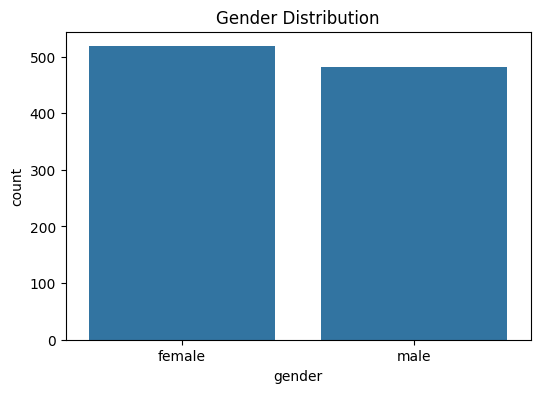

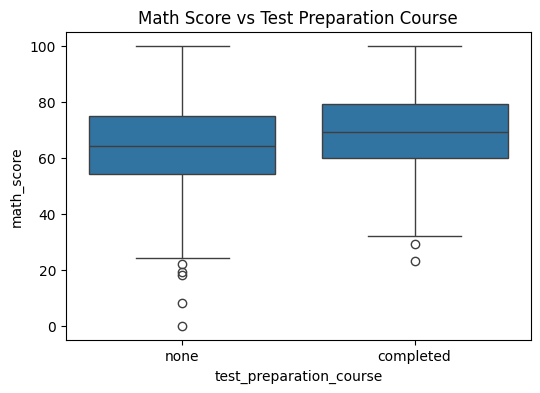

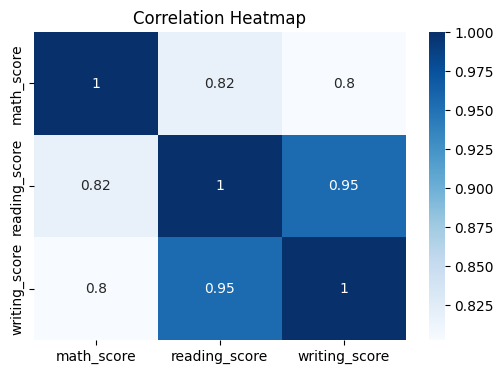


Encoded Data Sample:
    gender  race/ethnicity  parental_level_of_education  lunch  \
0       0               1                            1      1   
1       0               2                            4      1   
2       0               1                            3      1   
3       1               0                            0      0   
4       1               2                            4      1   

   test_preparation_course  math_score  reading_score  writing_score  
0                        1          72             72             74  
1                        0          69             90             88  
2                        1          90             95             93  
3                        1          47             57             44  
4                        1          76             78             75  

Train Samples: 800  | Test Samples: 200

✅ Model Evaluation:
Mean Absolute Error: 4.69
Mean Squared Error: 36.73
R² Score: 0.85


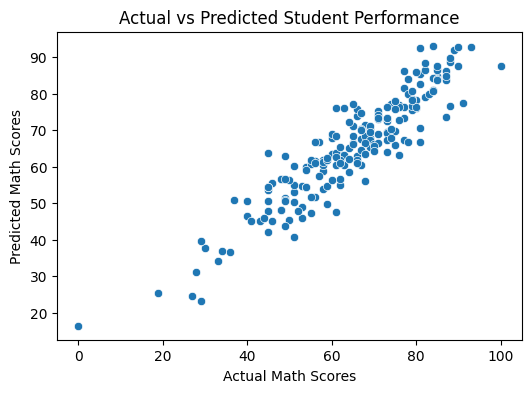


🎓 Predicted Math Score for New Student: 79.75


In [3]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

url = "https://raw.githubusercontent.com/rashida048/Datasets/master/StudentsPerformance.csv"
df = pd.read_csv(url)

print("✅ Dataset Loaded Successfully!")
print("Shape:", df.shape)
print("\nFirst 5 Rows:\n", df.head())

print("\nChecking Missing Values:\n", df.isnull().sum())


df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]
print("\nRenamed Columns:", df.columns.tolist())


plt.figure(figsize=(6,4))
sns.countplot(x='gender', data=df)
plt.title("Gender Distribution")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x='test_preparation_course', y='math_score', data=df)
plt.title("Math Score vs Test Preparation Course")
plt.show()

plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()


le = LabelEncoder()
categorical_cols = ['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

print("\nEncoded Data Sample:\n", df.head())


X = df.drop('math_score', axis=1)
y = df['math_score']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nTrain Samples:", X_train.shape[0], " | Test Samples:", X_test.shape[0])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n✅ Model Evaluation:")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

plt.figure(figsize=(6,4))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Math Scores")
plt.ylabel("Predicted Math Scores")
plt.title("Actual vs Predicted Student Performance")
plt.show()


new_student = pd.DataFrame({
    'gender': [1],
    'race/ethnicity': [2],
    'parental_level_of_education': [3],
    'lunch': [1],
    'test_preparation_course': [1],
    'reading_score': [78],
    'writing_score': [75]
})

new_student_scaled = scaler.transform(new_student)
predicted_math = model.predict(new_student_scaled)
print("\n🎓 Predicted Math Score for New Student:", predicted_math[0])
